In [418]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [419]:
from sklearn.datasets import make_classification

In [420]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [421]:
X

array([[ 1.03527501,  0.75613202],
       [ 1.54667366, -1.0965784 ],
       [ 1.01374267,  1.29722651],
       ...,
       [ 1.03541387,  0.90602624],
       [ 0.80267796,  1.60841096],
       [-0.10043288,  0.08218738]])

In [422]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

<Axes: xlabel='Feature1', ylabel='Feature2'>

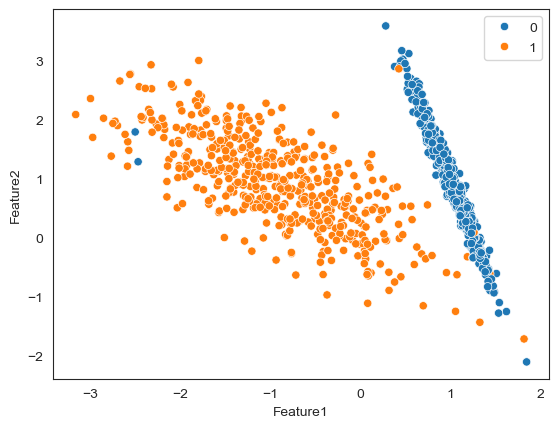

In [423]:
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])   
sns.scatterplot(data=df, x="Feature1", y="Feature2", hue=y)

In [424]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=20)

In [425]:
from sklearn.svm import SVC

In [426]:
svc = SVC(kernel='linear')

In [427]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [428]:
y_pred = svc.predict(X_test)

In [429]:
from sklearn.metrics import classification_report,confusion_matrix

In [430]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       138
           1       0.99      0.96      0.98       112

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[137   1]
 [  4 108]]


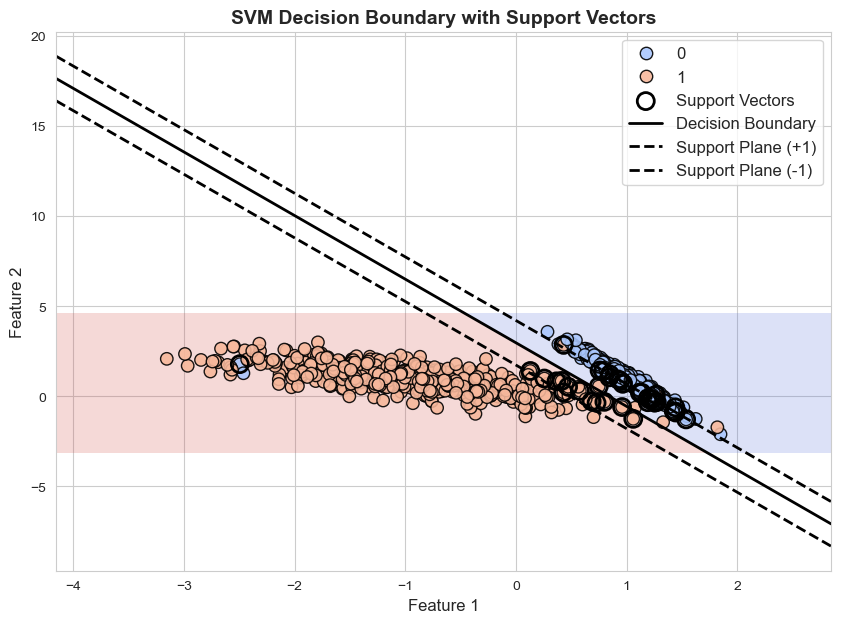

In [431]:
sns.set_style("whitegrid")

# Train the SVM model (Linear Kernel for Support Planes)
 

# Create a high-resolution mesh grid for a smooth decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict labels for each point in the mesh grid
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Get model coefficients (only works for linear kernel)
w = svc.coef_[0]  # Weight vector
b = svc.intercept_[0]  # Bias term

# Compute support planes
xx_vals = np.linspace(x_min, x_max, 500)
yy_decision = -(w[0] * xx_vals + b) / w[1]  # Decision boundary
yy_support1 = yy_decision + 1 / w[1]  # Support plane (+1)
yy_support2 = yy_decision - 1 / w[1]  # Support plane (-1)

# Plot
plt.figure(figsize=(10, 7))

# Plot decision boundary with a soft color gradient
plt.contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")

# Scatter plot of data points with well-balanced size and color
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="black", s=80, alpha=0.9, linewidth=1)

# Highlight support vectors subtly
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], 
            s=150, facecolors="none", edgecolors="black", linewidth=2, label="Support Vectors")

# Plot decision boundary and support planes
plt.plot(xx_vals, yy_decision, "k-", linewidth=2, label="Decision Boundary")  # Solid line
plt.plot(xx_vals, yy_support1, "k--", linewidth=2, label="Support Plane (+1)")  # Dashed line
plt.plot(xx_vals, yy_support2, "k--", linewidth=2, label="Support Plane (-1)")  # Dashed line

# Improve aesthetics
plt.title("SVM Decision Boundary with Support Vectors", fontsize=14, fontweight="bold")
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(fontsize=12, loc="upper right", frameon=True)
plt.show()

In [432]:
rbf = SVC(kernel='rbf',C=1,gamma='scale')

In [433]:
rbf.fit(X_train,y_train)

SVC(C=1)

In [434]:
y_pred_rbf = rbf.predict(X_test)

In [435]:
print(classification_report(y_test,y_pred_rbf))
print(confusion_matrix(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       138
           1       0.99      0.96      0.98       112

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[137   1]
 [  4 108]]


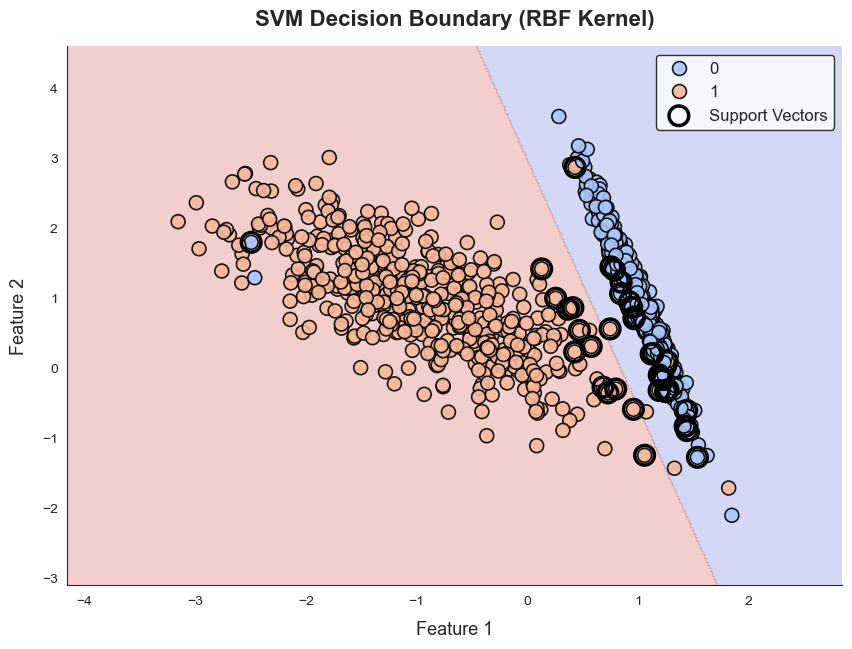

In [436]:
# Create a high-resolution mesh grid for smooth decision boundary
sns.set_style("white")
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict labels for each point in the mesh grid
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Initialize figure
plt.figure(figsize=(10, 7))

# Smooth decision boundary with a more visually appealing colormap
plt.contourf(xx, yy, Z, alpha=0.25, cmap="coolwarm")  

# Scatter plot of data points with enhanced aesthetics
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="black",
                s=100, alpha=0.9, linewidth=1.2, marker="o")

# Emphasize support vectors subtly
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], 
            s=200, facecolors="none", edgecolors="black", linewidth=2.5, label="Support Vectors")

# Customize plot aesthetics
plt.title("SVM Decision Boundary (RBF Kernel)", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Feature 1", fontsize=13, labelpad=10)
plt.ylabel("Feature 2", fontsize=13, labelpad=10)

# Remove top and right spines for a cleaner look
sns.despine()

# Adjust legend positioning and styling
plt.legend(fontsize=12, loc="upper right", frameon=True, edgecolor="black")

# Show the final plot
plt.show()